In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import DescrStatsW

In [82]:
df = pd.read_csv('dados.csv')

df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Testes de Hipóteses

### Teste de normalidade

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

#### Teste de normalidade

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

In [83]:
# Nível de significância do teste (Probabilidade do estimador estar errado)

significancia = 0.05

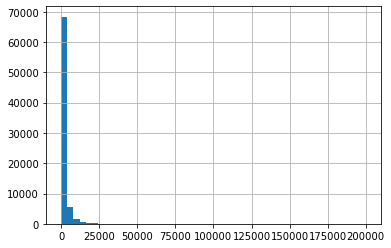

In [84]:
# Testando varíavel Renda

df['Renda'].hist(bins = 50)
plt.show()

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [85]:
stat_test, p_valor = normaltest(df['Renda'])
print(stat_test)
print(p_valor)

152380.75803960307
0.0


In [86]:
# Amostra de renda não é  proveniente de uma distribuição normal.

p_valor <= significancia

True

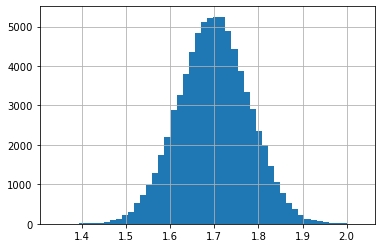

In [87]:
# Testando varíavel Altura

df['Altura'].hist(bins = 50)
plt.show()

In [88]:
stat_test, p_valor = normaltest(df['Altura'])
print(stat_test)
print(p_valor)

0.19973093957002253
0.9049591541967501


In [89]:
# Amostra de altura é  proveniente de uma distribuição normal.

p_valor <= significancia

False

#### Etapas básicas de um Teste

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='red'>Pontos importantes</font>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

## Testes Paramétricos

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

#### Teste Bicaudal

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

##### Dados do problema

In [90]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [91]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [92]:
media_amostra = amostra.mean()[0]
media_amostra

503.24

In [93]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

4.483803050527347

In [94]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [95]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [96]:
# Obtendo 𝑧𝛼/2

z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [97]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

5.109559775991877

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [98]:
z <= z_alpha_2

False

In [99]:
z >= z_alpha_2

True

### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Considerando um nível de significância igual a 5%, responda as seguintes questões:

1) Qual a hipótese nula a ser testada?

2) Qual o valor da estatística de teste?

3) Qual a conclusão do teste?

In [100]:
media_amostra = 485
desvio_padrao = 20
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 30

probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)

z = (media_amostra - media) / (desvio_padrao / np.sqrt(n))

print('z =', round(z, 4))
if(z <= -z_alpha_2 or z >= z_alpha_2):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

z = -4.1079
Rejeitar H0


### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [101]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50
media_amostra = amostra.mean()[0]
desvio_padrao_amostra = amostra.std()[0]

z_alpha_2 = norm.ppf(0.975)

z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))

In [102]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

3.2291031715203644e-07

In [103]:
# Outra forma

p_valor = 2 * (norm.sf(z))
p_valor

3.229103172445718e-07

In [104]:
# Rejeitar H0

p_valor <= significancia

True

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [105]:
# Calcular p_valor automatizado
# Estatística de teste e p-valor

ztest(x1 = amostra, value= media)

(array([5.10955978]), array([3.22910317e-07]))

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [106]:
test = DescrStatsW(amostra)

In [107]:
test.ztest_mean(value = media)

(array([5.10955978]), array([3.22910317e-07]))

Considere novamente os dados do exercício anterior. Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Com um nível de significância igual a 5%, teste a hipótese nula de que a média do processo é igual a 500 g e marque a alternativa que indica o p-valor do teste aplicado (considere somente 5 casas decimais).

In [108]:
media_amostra = 485
desvio_padrao = 20
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 30

probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)

z = (media_amostra - media) / (desvio_padrao / np.sqrt(n))

In [109]:
# Teste unicaudal

p_valor = 2 * (1 - norm.cdf(abs(z))) 
p_valor

3.992397476904053e-05